In [2]:
import pandas as pd
import numpy as np
from scipy.io import loadmat as loadmat
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

# Suppress warnings`
warnings.filterwarnings("ignore")

In [3]:
import xy

# $因子描述：计算VMACD因子的中间变量，刻画短期成交量突破$

***EMA(VOLUME，SHORT)-EMA(VOLUME，LONG)***  

## 计算

In [4]:
st_VDIFF4 = (xy.volumes.T.ewm(span=4,adjust=False).mean() - xy.volumes.T.ewm(span=8,adjust=False).mean()).T
st_VDIFF5 = (xy.volumes.T.ewm(span=5,adjust=False).mean() - xy.volumes.T.ewm(span=10,adjust=False).mean()).T
st_VDIFF6 = (xy.volumes.T.ewm(span=6,adjust=False).mean() - xy.volumes.T.ewm(span=12,adjust=False).mean()).T
st_VDIFF7 = (xy.volumes.T.ewm(span=7,adjust=False).mean() - xy.volumes.T.ewm(span=14,adjust=False).mean()).T
st_VDIFF8 = (xy.volumes.T.ewm(span=8,adjust=False).mean() - xy.volumes.T.ewm(span=16,adjust=False).mean()).T

In [5]:
st_VDIFF_mean = st_VDIFF4 + st_VDIFF5 + st_VDIFF6 + st_VDIFF7 + st_VDIFF8  
st_index_VDIFF_mean = xy.read_Factor(xy.trd_dates,'st_VDIFF',df=st_VDIFF_mean)

## 评估

### cl-cl

-0.03303677374894537
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

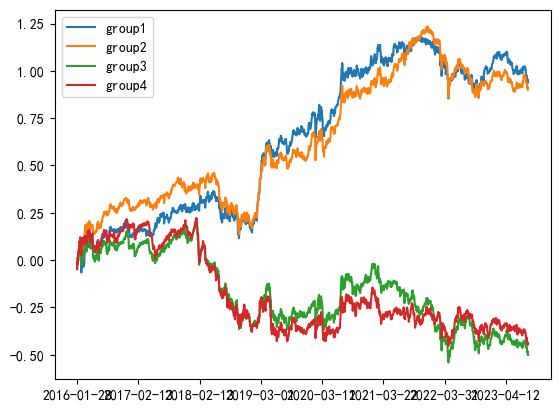

In [6]:
# 分组收益率
gr_st_index_VDIFF_mean = xy.cal_rate_group(
    st_index_VDIFF_mean.loc[['50', '300', '500', '1000'],'2016-01-28':],
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-28':],
    group_num=4,
    masks=1
)
gr_st_index_VDIFF_mean.cumsum().plot()

1954.0
yoy: 0.19426908186311934 
 mdd: -0.2889803757167042 
 sharpe: 1.13768615876365 
 rankIC: -0.02782037239868565 
 rankIR: -0.036220440512581054 
 win%: 0.5131434830230011 
 gain_loss%: -1.1555742155782327


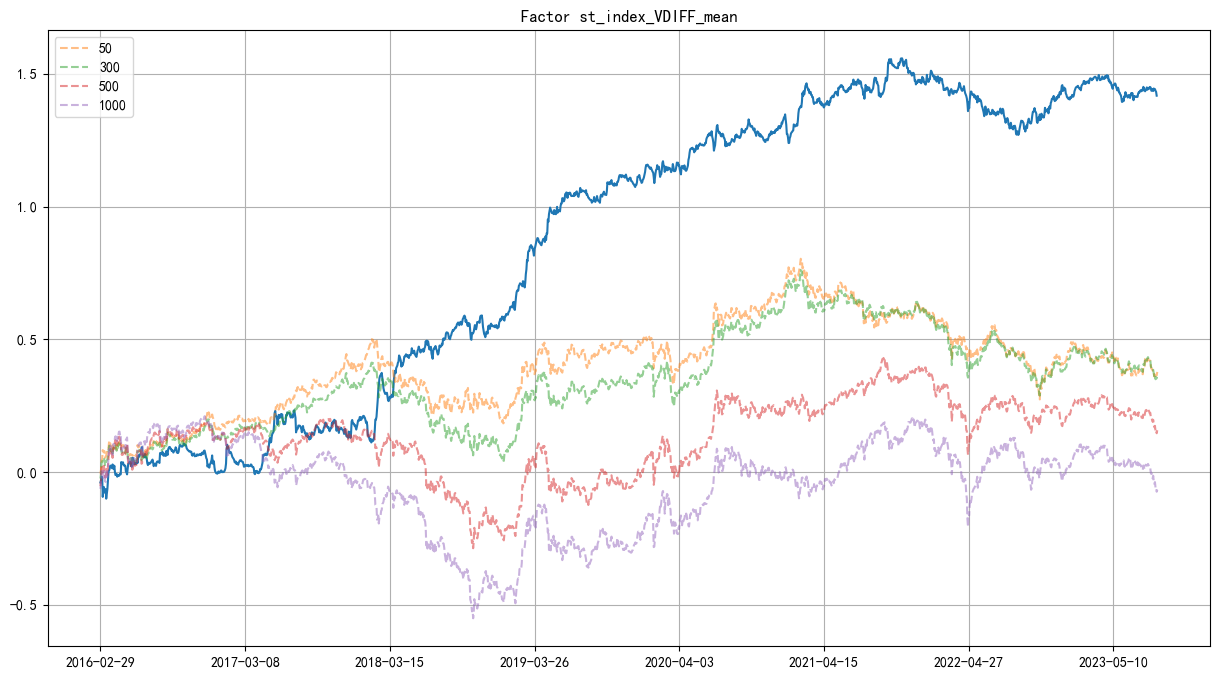

In [7]:
# 单因子强弱
st_index_VDIFF_mean_select, st_index_VDIFF_mean_rets = xy.single_Factor_backtest(
    st_index_VDIFF_mean.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    _side=-1,
    fee=0.000,
    name='st_index_VDIFF_mean'
)

1892.0
yoy: 0.20659000961801102 
 mdd: -0.2870028333343224 
 sharpe: 1.197876723376556 
 rankIC: -0.03165714285714286 
 rankIR: -0.04125456408974641 
 win%: 0.5171428571428571 
 gain_loss%: -1.1494092694156572


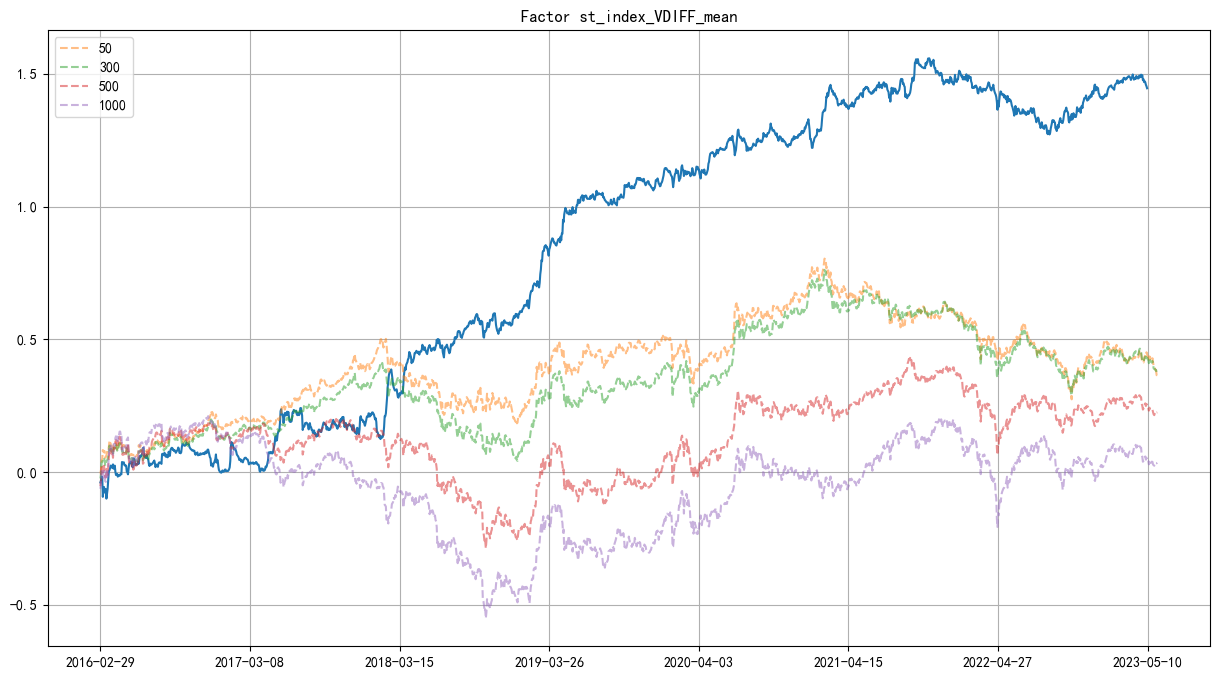

In [9]:
# 单因子强弱
st_index_VDIFF_mean_select, st_index_VDIFF_mean_rets = xy.single_Factor_backtest(
    st_index_VDIFF_mean.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    _side=-1,
    fee=0.000,
    name='st_index_VDIFF_mean'
)

-0.03165714285714286

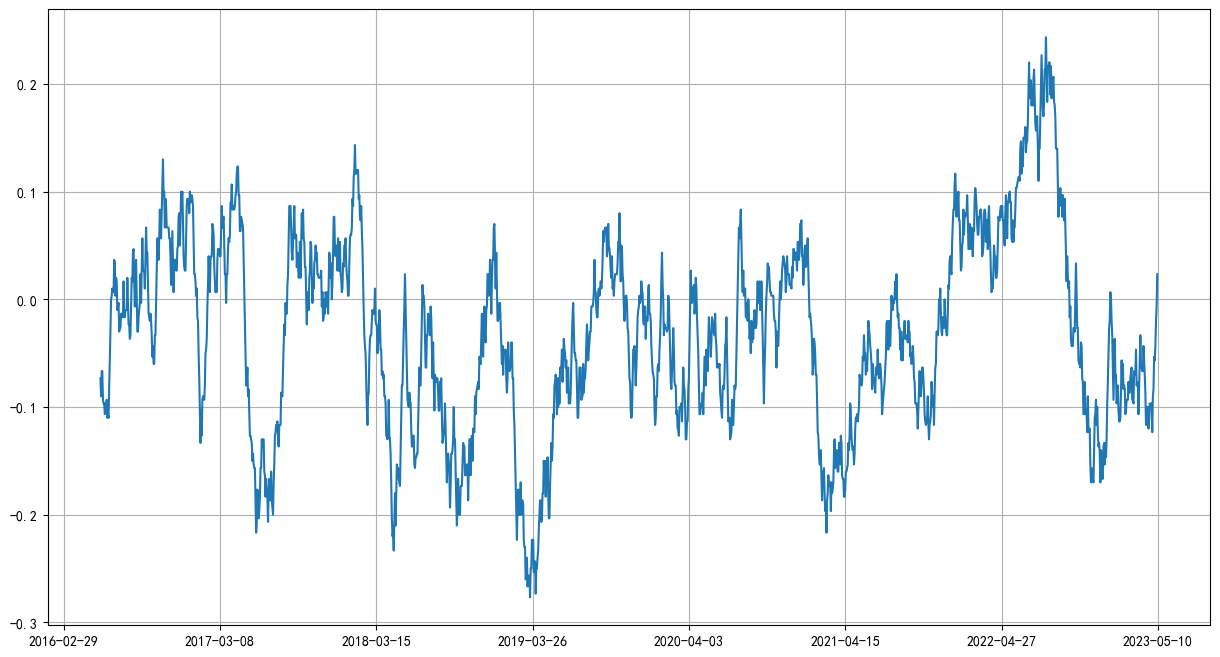

In [10]:
# 因子截面IC趋势
rankIC = xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False).corrwith(st_index_VDIFF_mean.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False))
rankIC.rolling(60).mean().plot(figsize=(15,8),grid=1)
rankIC.mean()

### cl_op

-0.11170198658732118
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

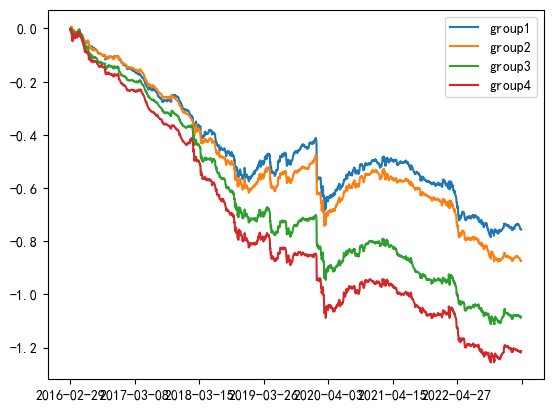

In [11]:
# 分组收益率
gr_st_index_VDIFF_mean = xy.cal_rate_group(
    st_index_VDIFF_mean.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.bonus_open_cl_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    group_num=4,
    masks=1
)
gr_st_index_VDIFF_mean.cumsum().plot()

1892.0
yoy: 0.06500890199924292 
 mdd: -0.0698005062008823 
 sharpe: 1.3768424798209506 
 rankIC: -0.08560000000000001 
 rankIR: -0.11771742106121949 
 win%: 0.5502857142857143 
 gain_loss%: -1.0683846263980044


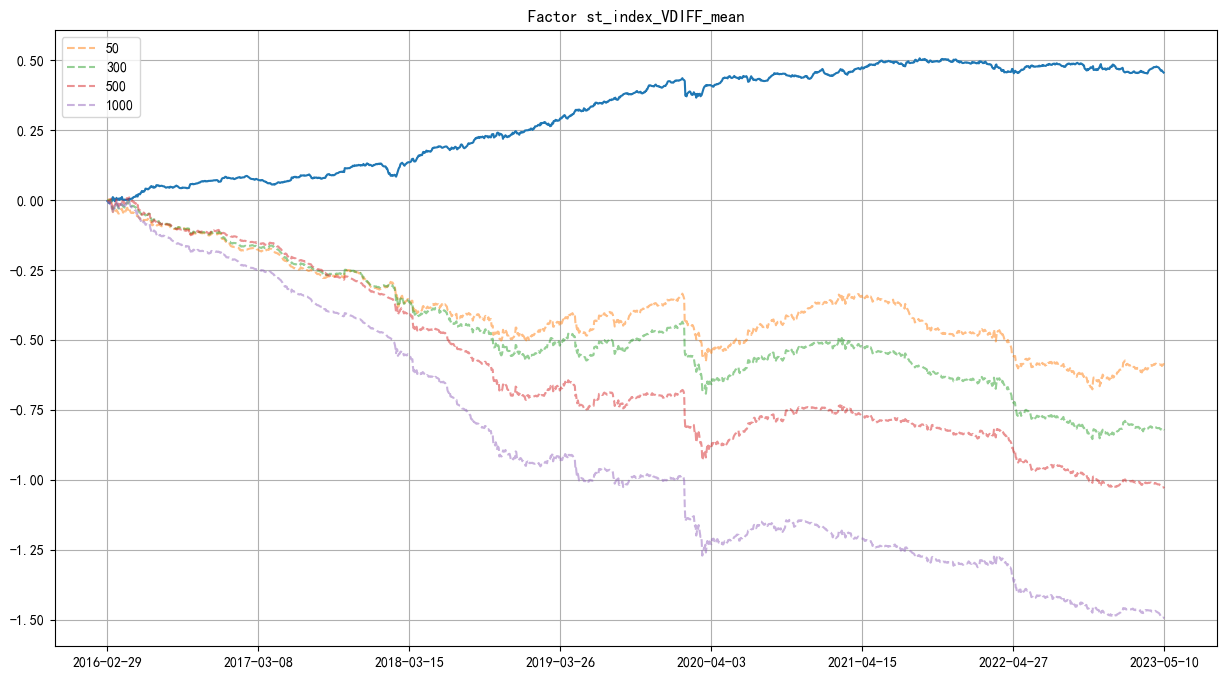

In [12]:
# 单因子强弱
st_index_VDIFF_mean_select, st_index_VDIFF_mean_rets = xy.single_Factor_backtest(
    st_index_VDIFF_mean.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.bonus_open_cl_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    _side=-1,
    fee=0.000,
    name='st_index_VDIFF_mean'
)

-0.08560000000000001

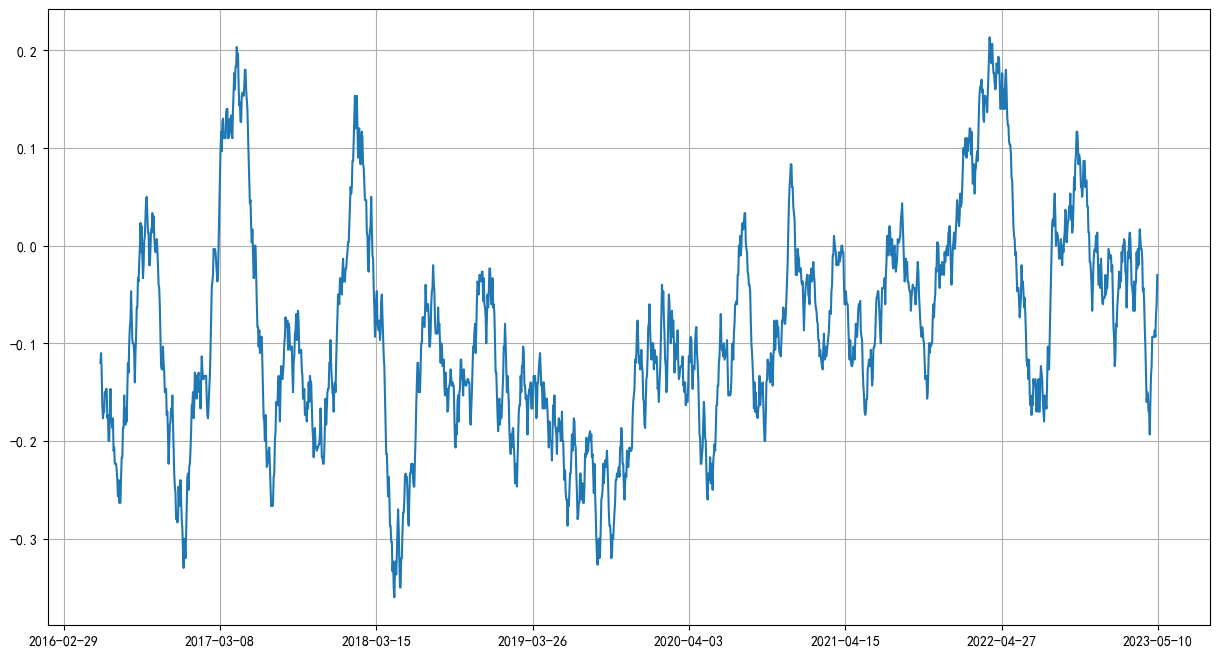

In [13]:
# 因子截面IC趋势
rankIC = xy.bonus_open_cl_rets.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False).corrwith(st_index_VDIFF_mean.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False))
rankIC.rolling(60).mean().plot(figsize=(15,8),grid=1)
rankIC.mean()

In [8]:
(-st_index_VDIFF_mean).to_csv(r'E:\PyProject\factors\NewFactor\st_index_VDIFF_mean.csv')